# CENSUS INCOME PROJECT

Submitted by:Sucharitha A M
             1869 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df=pd.read_csv("census.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Dataset contains all nullvalues will be zero

In [5]:
df.shape

(32560, 15)

Dataset contains 32560 rows and 15 columns

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Dataset contains 15 columns

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Summary Stastics

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile .

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [9]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Target/dependent variables is discrete and categorial in nature

In [10]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Here Native_country contains some categorical values

# Data Visualizations

<AxesSubplot:xlabel='Age', ylabel='count'>

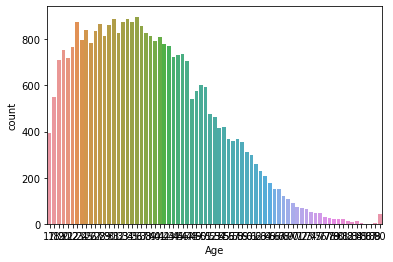

In [11]:
sns.countplot(df['Age'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

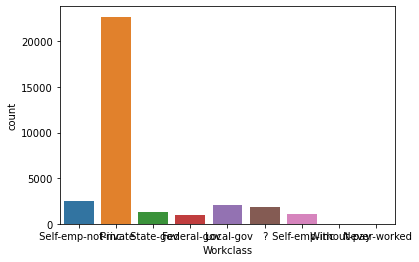

In [12]:
sns.countplot(df['Workclass'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Education', ylabel='count'>

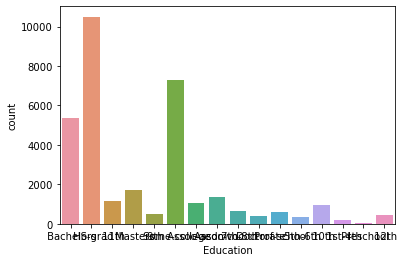

In [13]:
sns.countplot(df['Education'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

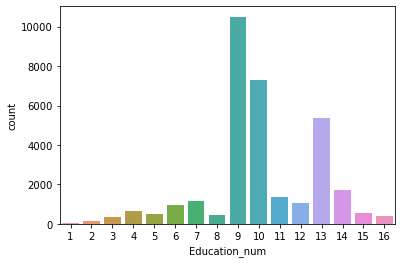

In [14]:
sns.countplot(df['Education_num'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

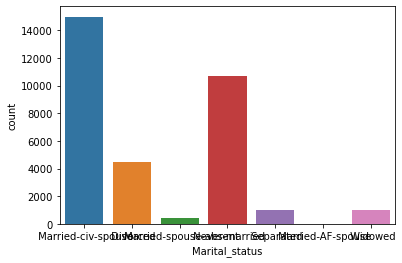

In [15]:
sns.countplot(df['Marital_status'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

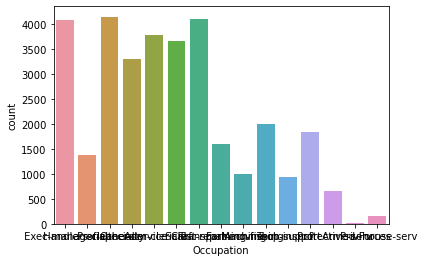

In [16]:
sns.countplot(df['Occupation'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Native_country', ylabel='count'>

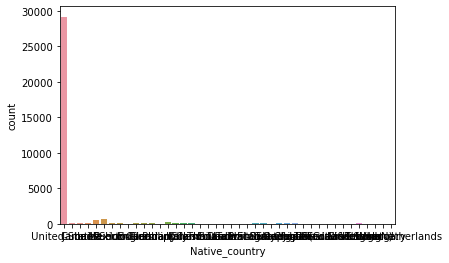

In [17]:
sns.countplot(df['Native_country'])

Here Data in not normally distributed in the all columns.

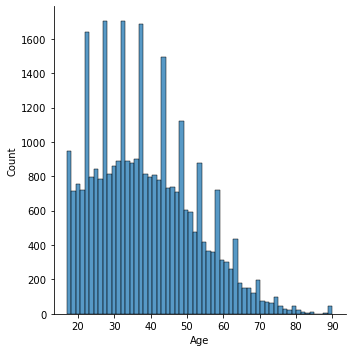

In [18]:
sns.displot(df['Age'])

Here Data in not normally distributed in the all columns.

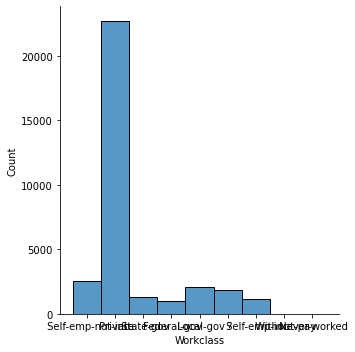

In [19]:
sns.displot(df['Workclass'])

Here Data in not normally distributed in the all columns.

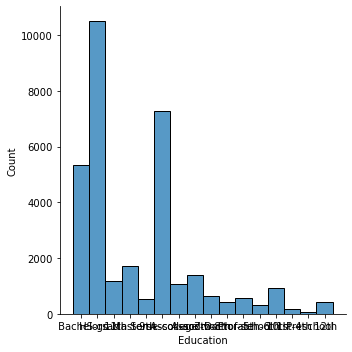

In [20]:
sns.displot(df['Education'])

Here Data in not normally distributed in the all columns.

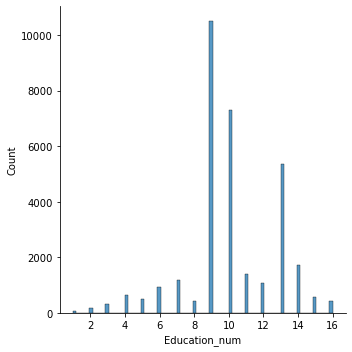

In [21]:
sns.displot(df['Education_num'])

Here Data in not normally distributed in the all columns.

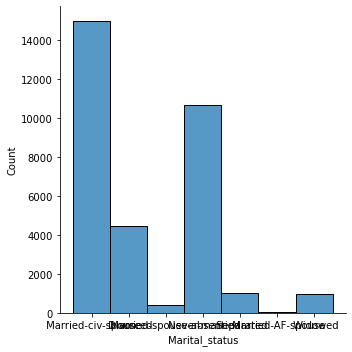

In [22]:
sns.displot(df['Marital_status'])

Here Data in not normally distributed in the all columns.

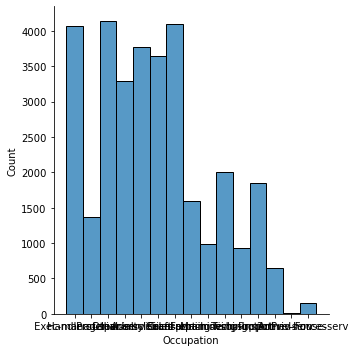

In [23]:
sns.displot(df['Occupation'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:>

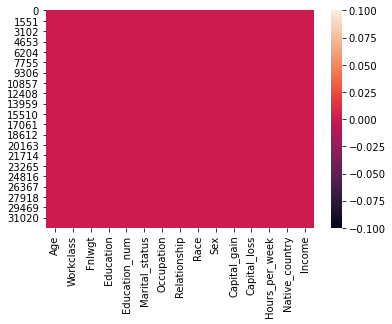

In [24]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [25]:
dfcor=df.corr()
dfcor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

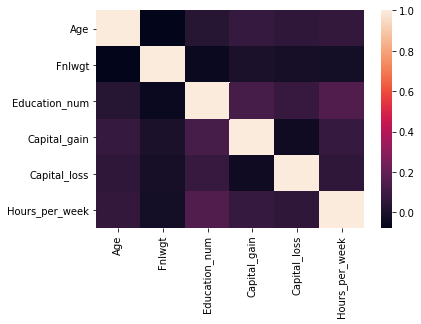

In [26]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

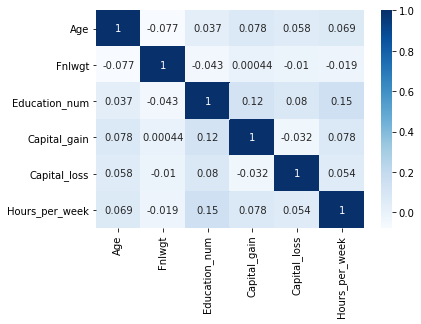

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

 Dark shades are higly correlated

<AxesSubplot:>

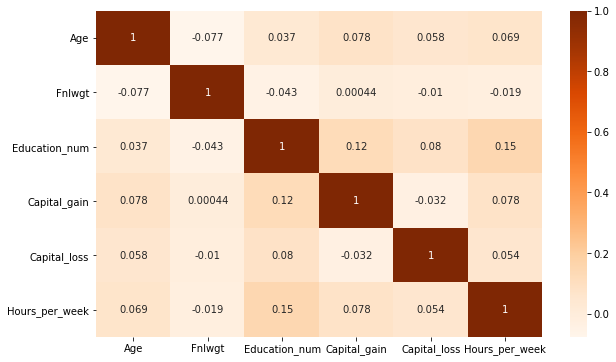

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

Hour_per_week is higly correlated with capital_loss

capital_loss is highly negatively correlated with capital_gain 

capital_gain is higly positively correlated with age

age is negatively correlated with house_per_week


# Plotting Outliers

In [29]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:>

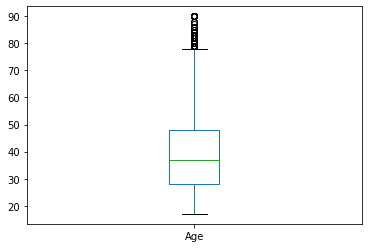

In [30]:
df["Age"].plot.box()

Here age have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

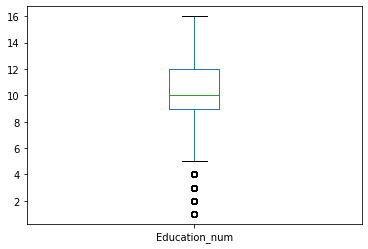

In [31]:
df["Education_num"].plot.box()

Here education_num have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

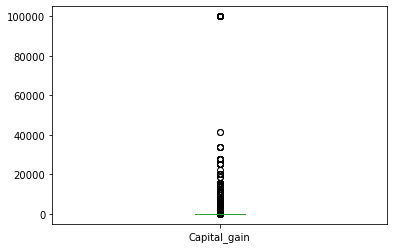

In [32]:
df["Capital_gain"].plot.box()

Here capital_gain have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

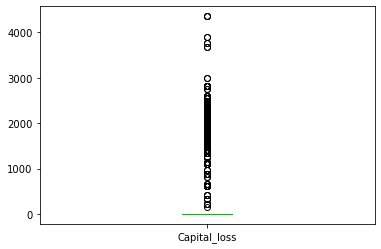

In [33]:
df["Capital_loss"].plot.box()

Here capital_loss have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

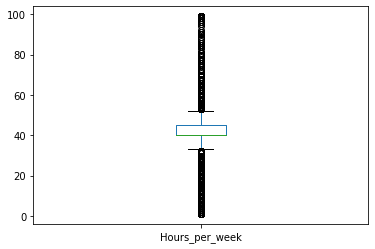

In [34]:
df["Hours_per_week"].plot.box()

Here hours_per_week have  outside the viscous so we can find here outliers easily.

In [35]:
df.shape

(32560, 15)

Dataset contains 32560 rows and 15 columns

# To Check Distribution of Skewness

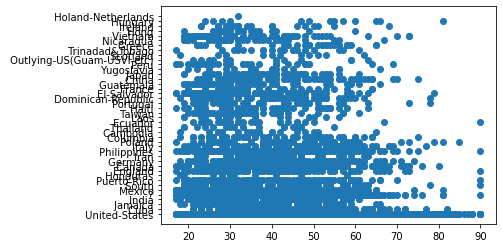

In [36]:
plt.scatter(df['Age'],df['Native_country'])

scattering the values of age and native_country

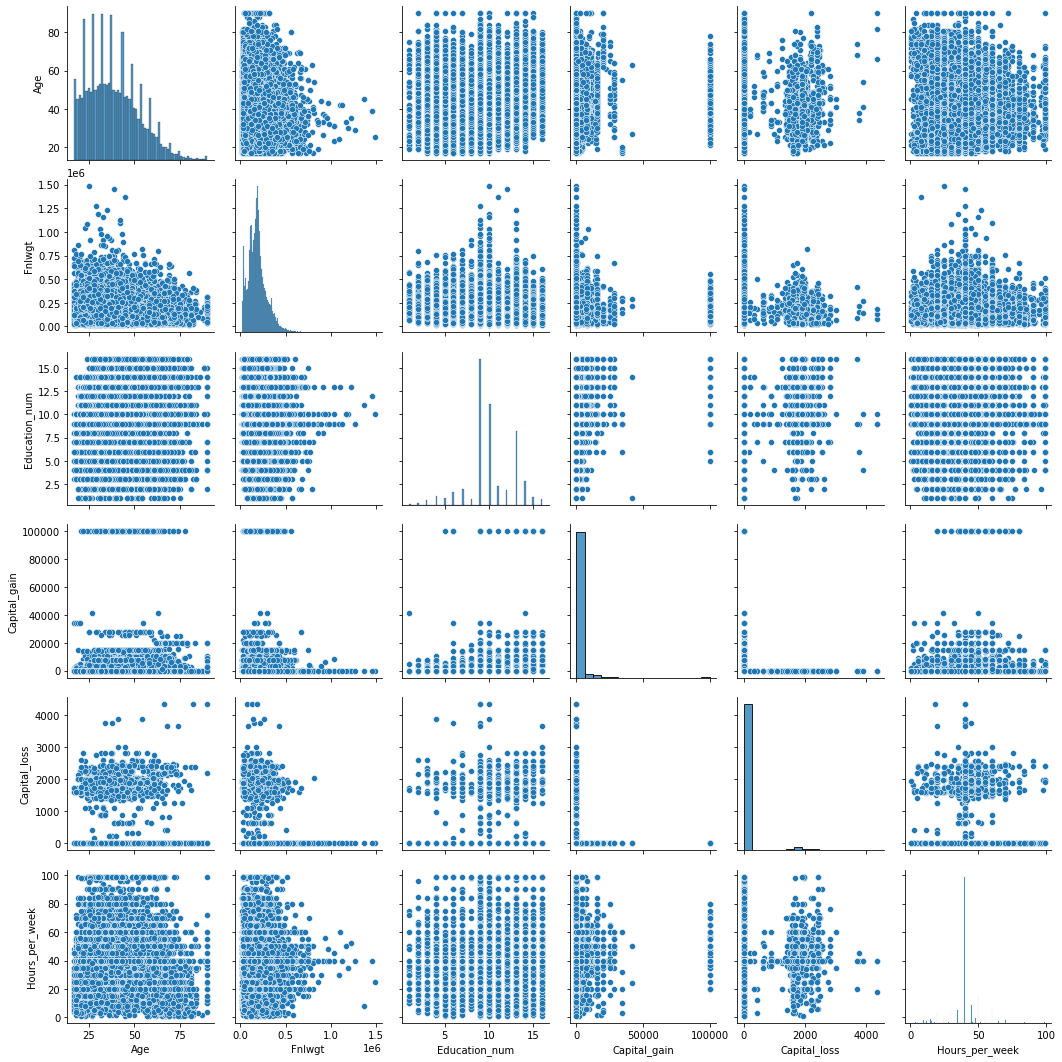

In [37]:
sns.pairplot(df)

Remove the missing values.

drop  the nagativitycorrelated columns.

remove the outliers.

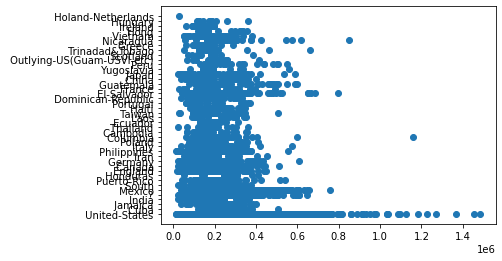

In [38]:
plt.scatter(df['Fnlwgt'],df['Native_country'])
plt.show()

Here scatter plots of Fnlwgt and Native_country

In [39]:
df.drop('Fnlwgt',axis=1,inplace=True)
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [40]:
df.shape

(32560, 14)

Here Dataset contains 32560 rows and 14 columns

In [41]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

Dataset contains 14 columns

# Encoding Method

In [42]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Age']=LE.fit_transform(df['Age'])


In [43]:
df.Age.unique()

array([33, 21, 36, 11, 20, 32, 35, 14, 25, 13,  6, 15, 23, 17,  8, 26, 37,
       18, 42, 39,  2, 22,  3, 28,  5, 31,  4,  7, 40, 27, 24, 12,  1, 30,
       29, 19, 62, 10, 50, 16, 59,  0, 38, 44, 53, 47, 54, 51, 49, 34, 41,
        9, 43, 72, 58, 48, 60, 45, 46, 63, 55, 57, 52, 56, 64, 61, 71, 65,
       66, 67, 68, 69, 70], dtype=int64)

In [44]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,21,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Marital_status']=LE.fit_transform(df['Marital_status'])


In [46]:
df.Marital_status.unique()

array([2, 0, 3, 4, 5, 1, 6])

In [47]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,Self-emp-not-inc,Bachelors,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,21,Private,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,Private,11th,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,Private,Bachelors,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,Private,Masters,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Workclass']=LE.fit_transform(df['Workclass'])


In [49]:
df.Workclass.unique()

array([6, 4, 7, 1, 2, 0, 5, 8, 3])

In [50]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,Bachelors,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,21,4,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,4,11th,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,4,Bachelors,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,4,Masters,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])


In [52]:
df.Education.unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [53]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,21,4,11,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,4,1,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,4,9,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,4,12,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Occupation']=LE.fit_transform(df['Occupation'])


In [55]:
df.Occupation.unique()

array([ 4,  6, 10,  8,  1, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [56]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,Husband,White,Male,0,0,13,United-States,<=50K
1,21,4,11,9,0,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,36,4,1,7,2,6,Husband,Black,Male,0,0,40,United-States,<=50K
3,11,4,9,13,2,10,Wife,Black,Female,0,0,40,Cuba,<=50K
4,20,4,12,14,2,4,Wife,White,Female,0,0,40,United-States,<=50K


In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Relationship']=LE.fit_transform(df['Relationship'])


In [58]:
df.Relationship.unique()

array([0, 1, 5, 3, 4, 2])

In [59]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,White,Male,0,0,13,United-States,<=50K
1,21,4,11,9,0,6,1,White,Male,0,0,40,United-States,<=50K
2,36,4,1,7,2,6,0,Black,Male,0,0,40,United-States,<=50K
3,11,4,9,13,2,10,5,Black,Female,0,0,40,Cuba,<=50K
4,20,4,12,14,2,4,5,White,Female,0,0,40,United-States,<=50K


In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Race']=LE.fit_transform(df['Race'])


In [61]:
df.Race.unique()

array([4, 2, 1, 0, 3])

In [62]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,4,Male,0,0,13,United-States,<=50K
1,21,4,11,9,0,6,1,4,Male,0,0,40,United-States,<=50K
2,36,4,1,7,2,6,0,2,Male,0,0,40,United-States,<=50K
3,11,4,9,13,2,10,5,2,Female,0,0,40,Cuba,<=50K
4,20,4,12,14,2,4,5,4,Female,0,0,40,United-States,<=50K


In [63]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])


In [64]:
df.Sex.unique()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


array([1, 0])

In [65]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,4,1,0,0,13,United-States,<=50K
1,21,4,11,9,0,6,1,4,1,0,0,40,United-States,<=50K
2,36,4,1,7,2,6,0,2,1,0,0,40,United-States,<=50K
3,11,4,9,13,2,10,5,2,0,0,0,40,Cuba,<=50K
4,20,4,12,14,2,4,5,4,0,0,0,40,United-States,<=50K


In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Native_country']=LE.fit_transform(df['Native_country'])


In [67]:
df.Native_country.unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

In [68]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,21,4,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,36,4,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,11,4,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,20,4,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [69]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Income']=LE.fit_transform(df['Income'])


In [70]:
df.Income.unique()

array([0, 1])

In [71]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,4,1,0,0,13,39,0
1,21,4,11,9,0,6,1,4,1,0,0,40,39,0
2,36,4,1,7,2,6,0,2,1,0,0,40,39,0
3,11,4,9,13,2,10,5,2,0,0,0,40,5,0
4,20,4,12,14,2,4,5,4,0,0,0,40,39,0


# Missing value Handling Method

In [72]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here all Datset contains sum value will be zero

In [73]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Marital_status"]=df["Marital_status"].fillna(df["Marital_status"].median())

In [74]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here all values will be zeros

# Checking Skewness

In [75]:
df.skew()

Age                0.555583
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Dataset contains the skewness values

In [76]:
x_train=df.drop("Workclass",axis=1)
y_train=df["Workclass"]

In [77]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

Dataset contains the 14 columns

# Removing Outliers

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83749664, 1.46388339, 0.33544266, ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.042559  , 0.09012148, 0.18131885, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05751055, 0.09012148, 2.40248871, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42420039, 0.09012148, 0.18131885, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21596651, 0.09012148, 0.18131885, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98417258, 0.77700244, 0.18131885, ..., 0.03542999, 0.29157343,
        1.77553698]])

Here removing outliers of df

In [79]:
z_scores = zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df.head(5)

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,4,1,0,0,13,39,0
1,21,4,11,9,0,6,1,4,1,0,0,40,39,0
2,36,4,1,7,2,6,0,2,1,0,0,40,39,0
4,20,4,12,14,2,4,5,4,0,0,0,40,39,0
5,32,4,6,5,3,8,1,2,0,0,0,16,23,0


In [80]:
df.shape

(32560, 14)

Dataset contains 32560 rows and 14 columns

# Feature Engineering

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [82]:
scaledX

array([[ 0.83749664,  1.46388339, -0.33544266, ..., -2.22212013,
         0.29157343, -0.5632099 ],
       [-0.042559  ,  0.09012148,  0.18131885, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       [ 1.05751055,  0.09012148, -2.40248871, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       ...,
       [ 1.42420039,  0.09012148,  0.18131885, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       [-1.21596651,  0.09012148,  0.18131885, ..., -1.65520046,
         0.29157343, -0.5632099 ],
       [ 0.98417258,  0.77700244,  0.18131885, ..., -0.03542999,
         0.29157343,  1.77553698]])

Here Standardscaler values of scaledX

In [83]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [84]:
Y.explained_variance_ratio_

array([0.17137765, 0.10296028, 0.09037391, 0.08140058, 0.07434029,
       0.07312753, 0.0695387 , 0.06138706, 0.06046018, 0.05463309,
       0.04948042, 0.04651222, 0.03728711, 0.02712097])

In [85]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 17.1377645 ,  27.43379233,  36.47118349,  44.61124161,
        52.04527041,  59.3580239 ,  66.31189439,  72.45060004,
        78.4966181 ,  83.95992751,  88.90796947,  93.55919131,
        97.28790268, 100.        ])

In [86]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 13


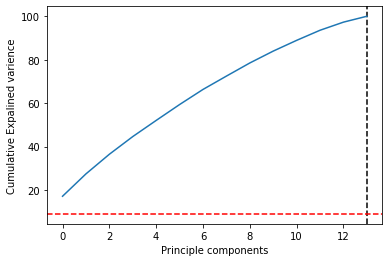

In [87]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here yplot is cumaltive explained varience and xplot is principle components

# Model Building

In [88]:
x_train=df.drop("Workclass",axis=1)
y_train=df["Workclass"]

In [89]:
x_train.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,9,13,2,4,0,4,1,0,0,13,39,0
1,21,11,9,0,6,1,4,1,0,0,40,39,0
2,36,1,7,2,6,0,2,1,0,0,40,39,0
3,11,9,13,2,10,5,2,0,0,0,40,5,0
4,20,12,14,2,4,5,4,0,0,0,40,39,0


In [90]:
y_train.head()

0    6
1    4
2    4
3    4
4    4
Name: Workclass, dtype: int32

In [91]:
x_train.shape

(32560, 13)

Here x_train contains 32560 rows and 13 columns

In [92]:
y_train.shape

(32560,)

Here y_train contains 32560 rows and zero columns

In [93]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,9,13,2,4,0,4,1,0,0,13,39,0
1,21,4,11,9,0,6,1,4,1,0,0,40,39,0
2,36,4,1,7,2,6,0,2,1,0,0,40,39,0
3,11,4,9,13,2,10,5,2,0,0,0,40,5,0
4,20,4,12,14,2,4,5,4,0,0,0,40,39,0


# Classification Methods

In [94]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [95]:
x=df.drop(["Marital_status"],axis=1)
y=df["Marital_status"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=50, test_size=0.2)

In [96]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

77.5337366216845 at random_state 0
78.28757561656585 at random_state 1
78.36202885062819 at random_state 2
78.5295486272685 at random_state 3
78.23173569101908 at random_state 4
77.88738948348069 at random_state 5
78.5295486272685 at random_state 6
78.01768264308981 at random_state 7
78.1945090739879 at random_state 8
77.93392275476965 at random_state 9
77.91530944625407 at random_state 10
78.5481619357841 at random_state 11
78.56677524429966 at random_state 12
78.16658911121452 at random_state 13
78.76221498371335 at random_state 14
78.24104234527687 at random_state 15
78.5295486272685 at random_state 16
78.09213587715217 at random_state 17
78.35272219637041 at random_state 18
78.23173569101908 at random_state 19
78.53885528152628 at random_state 20
78.57608189855748 at random_state 21
77.87808282922289 at random_state 22
78.63192182410424 at random_state 23
78.40856212191717 at random_state 24
77.93392275476965 at random_state 25
79.31130758492321 at random_state 26
78.42717543043275

In [97]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=0)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)        


Best accuracy is 0.7840909090909091  on Random_state 1


In [98]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.46      0.49      0.48      1353
           1       0.00      0.00      0.00        11
           2       0.98      0.98      0.98      4426
           3       0.06      0.07      0.06       114
           4       0.78      0.76      0.77      3235
           5       0.12      0.11      0.12       333
           6       0.36      0.34      0.35       296

    accuracy                           0.78      9768
   macro avg       0.40      0.39      0.39      9768
weighted avg       0.78      0.78      0.78      9768

Test Accuracy:78.11%


The Test Accuracy value of DecisionTreeClassifier is 78.01%

In [99]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1353
           1       0.00      0.00      0.00        11
           2       0.54      0.94      0.69      4426
           3       0.00      0.00      0.00       114
           4       0.80      0.53      0.64      3235
           5       0.00      0.00      0.00       333
           6       0.00      0.00      0.00       296

    accuracy                           0.60      9768
   macro avg       0.19      0.21      0.19      9768
weighted avg       0.51      0.60      0.52      9768

Test Accuracy:60.07%


The Test Accuracy of logisticregression is 60.07%

In [100]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86
Best KNN Value:1
Test Accuarcy:98.86


In [101]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.41      0.36      0.39      1353
           1       0.00      0.00      0.00        11
           2       0.72      0.86      0.79      4426
           3       0.00      0.00      0.00       114
           4       0.75      0.73      0.74      3235
           5       0.12      0.01      0.02       333
           6       0.38      0.14      0.20       296

    accuracy                           0.69      9768
   macro avg       0.34      0.30      0.30      9768
weighted avg       0.65      0.69      0.66      9768

Test Accuracy:68.81%


The Test Accuracy of  KNN clssifier is 68.81%

In [102]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.33      0.00      0.01      1353
           1       0.00      0.00      0.00        11
           2       0.45      1.00      0.62      4426
           3       0.00      0.00      0.00       114
           4       0.67      0.00      0.00      3235
           5       0.00      0.00      0.00       333
           6       0.00      0.00      0.00       296

    accuracy                           0.45      9768
   macro avg       0.21      0.14      0.09      9768
weighted avg       0.47      0.45      0.28      9768

Test Accuracy:45.39%


The Test Accuracy of SVC is 45.39%

In [103]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.33      0.03      0.06      1353
           1       0.00      0.82      0.00        11
           2       0.79      0.27      0.41      4426
           3       0.06      0.18      0.08       114
           4       0.64      0.26      0.37      3235
           5       0.12      0.09      0.10       333
           6       0.33      0.19      0.24       296

    accuracy                           0.23      9768
   macro avg       0.32      0.26      0.18      9768
weighted avg       0.63      0.23      0.33      9768

Test Accuracy:22.7%


The Test Accuracy of GaussianNB is 22.7%

In [104]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.51      0.59      0.55      1353
           1       0.00      0.00      0.00        11
           2       1.00      0.99      0.99      4426
           3       0.13      0.04      0.07       114
           4       0.79      0.85      0.82      3235
           5       0.15      0.04      0.07       333
           6       0.50      0.40      0.44       296

    accuracy                           0.82      9768
   macro avg       0.44      0.42      0.42      9768
weighted avg       0.81      0.82      0.81      9768

Test Accuracy:82.34%


The Test Accuracy of RandomForestClassifier is 82.37%

# Cross Value Correction

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.786977886977887


In [107]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.6018427518427518


In [108]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.6950245700245701


In [109]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.46062653562653566


In [110]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.217997542997543


In [111]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8283476658476658


# Hyperparameter Tunning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [114]:
rf = RandomForestClassifier()

In [115]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [116]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

# AUC ROC curve

In [117]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [118]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,2]
y_pred_prob

array([1.  , 0.  , 0.04, ..., 0.98, 0.02, 0.96])

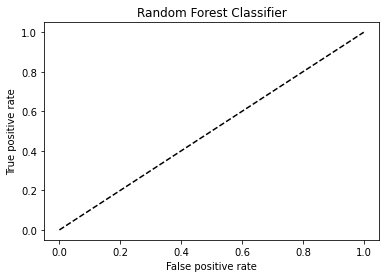

In [119]:
plt.plot([0,1],[0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()


Here the randomforestclassifier plot contains xlabel is false positive rate and y label is true positive rate.

#  Evaluate the Final Model

In [120]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.35053235053235


# Saving the Model

In [121]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here Saving the final model FinalModle.pkl

# Prediction Method

In [122]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[2 0 0 4 2 2 0 4 0 6 4 4 2 4 0 0 4 2 2 6 0 2 2 2 0 2 4 4 4 2 2 4 2 4 4 4]
[2 4 5 4 2 2 5 4 0 6 0 4 2 4 0 0 4 2 2 0 5 2 2 2 0 2 4 4 4 2 2 4 2 4 4 4]


The train and test data is balanced most classification methods hit the 82% accuracy with the datset.